# Desafío - Clasificación desde Machine Learning
* Para poder realziar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip
## Descripción
* En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
    - default : Variable binaria. Registra si el cliente entró en morosidad o no.
    - income : Ingreso promedio declarado por el cliente.
    - balance : Total de saldo en la cuenta de crédito.
    - student : Variable binaria. Registra si el cliente es estudiante o no.

# Desafío 1: Preparación del ambiente de trabajo
* Importe los módulos básicos para el análisis de datos
* Importe seaborn .
* Importe statsmodels
* Importe LogisticRegression , train_test_split , StandardScaler , classification_report y roc_curve de sklearn

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import lec6_graphs as gfx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_score

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10,6)

# Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
* Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
* Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
* Un boxplot del balance total de las cuentas, segmentado por el status de default.
* Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
* Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
* Un diagrama de dispersión entre balance e income , segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.

tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por
status

In [2]:
df = pd.read_csv('default_credit.csv')
df.head()

index default student      balance        income
0      1      No      No   729.526495  44361.625074
1      2      No     Yes   817.180407  12106.134700
2      3      No      No  1073.549164  31767.138947
3      4      No      No   529.250605  35704.493935
4      5      No      No   785.655883  38463.495879

Un boxplot del balance total de las cuentas, segmentado por el status de estudiante

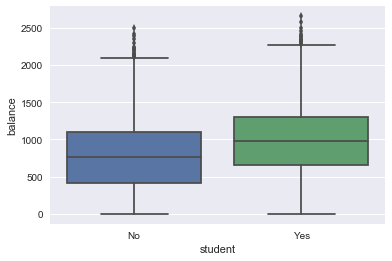

In [3]:
ax = sns.boxplot(x='student', y='balance', data=df)

Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.

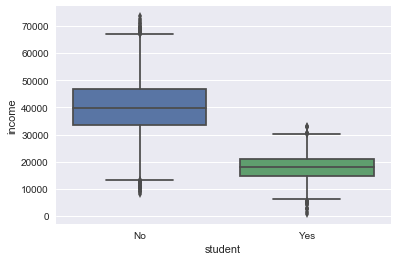

In [4]:
ax = sns.boxplot(x='student', y='income', data=df)

Un boxplot del balance total de las cuentas, segmentado por el status de default.

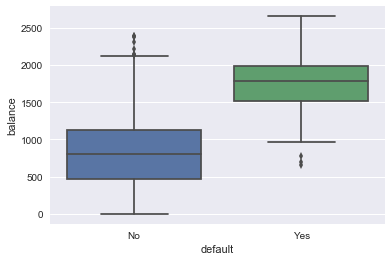

In [5]:
ax = sns.boxplot(x='default', y='balance', data=df)

Un boxplot del ingreso total de cada cliente, segmentado por el status de default

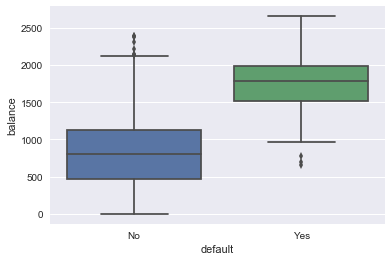

In [6]:
ax = sns.boxplot(x='default', y='balance', data=df)

Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
•

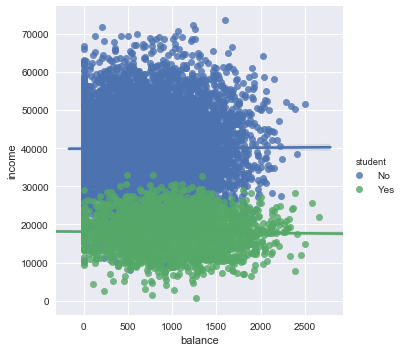

In [7]:
g = sns.lmplot(x='balance', y='income', hue='student', data= df)

•Un diagrama de dispersión entre balance e income , segmentado por el status de default.

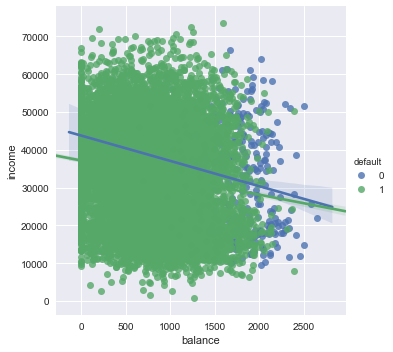

In [32]:
g = sns.lmplot(x='balance', y='income', hue='default', data=df)

 ## Comente brevemente sobre los principales patrones de comportamiento
 
 - En los graficos de caja 
 * es posible ver que en general  la mitad de las observaciones es menor que o igual al valor de la mediana  y la mitad es mayor que o igual al valor de la mediana, es decir, no son datos asimetricos
 
 
 - En los graficos de dispersion
 * en el primer grafico es posible apreciar que no exite correlacion entre las varibles  balance e income , segmentado por el status de estudiante
 * en el segundo grafico es posible apreciar que en las variables balance e income , segmentado por el status de default existe correlacion negativa debil. Si fuese mas fuerte, la pendiente seria mayor 

# Desafío 3: Modelación econométrica
* Recodifique las variables student y default para que adquieran atributos numéricos.
* Implemente el siguiente modelo econométrico:

$$log\left(\frac{Pr(default = 1)}{1-Pr(default=1)}\right) = \beta_0 + \beta_1 \cdot balance$$ + \beta_2 + \beta_3 \cdot student$$

* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.


In [9]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [10]:
df['student'] = np.where(df['student'].str.strip() == 'No', 1, 0) #Si es NO  se asigna 1 si es YES se asigna 0

In [11]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [12]:
df['default'] = np.where(df['default'].str.strip() == 'No', 1, 0)

In [13]:
df.head()

index  default  student      balance        income
0      1        1        1   729.526495  44361.625074
1      2        1        0   817.180407  12106.134700
2      3        1        1  1073.549164  31767.138947
3      4        1        1   529.250605  35704.493935
4      5        1        1   785.655883  38463.495879

Implemente el siguiente modelo econométrico 

In [14]:
m1_logit = smf.logit('default ~ balance + income + student', df).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        21:32:05   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5158      0.438     26.299      0.000      10.658      12.374
balance       -0.0057      0.000    -24.737      0.000      -0.006      -0.005
income     -3.033e-06    8.2e-06     -0.370      0.712   -1.91e-05     1.3e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

Sacamos variable income y realizamos otro modelo

In [15]:
m2_logit = smf.logit('default ~ balance + student', df).fit()
m2_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 11 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        21:32:05   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4644      0.415     27.656      0.000      10.652      12.277
balance       -0.0057      0.000    -24.748      0.000      -0.006      -0.005
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# El coeficiente del intercepto varia muy poco, y el coef. de la variable balance se mantiene constante.
# el coeficiente de la variable student cambia de -0.64 a -0.71

# Desafío 4: Entrenar
* A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
    * Estandarize la matriz de atributos.
    * Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
    * Implemente el modelo sin alterar los hiperparámetros.
    * Genere la predicción de las clases y de la probabilidad.
    * Reporte las métricas de precision, recall y f1 para ambas clases.
    * Grafique la curva Receiver Operator Characteristic.
    * En base a los pasos, comente sobre el desempeño predictivo del modelo

In [16]:
# estandarizar y dividir la muestra
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(df.loc[:,'student':'balance']),df['default'], test_size=0.33, random_state=16254)

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
default_model = LogisticRegression().fit(X_train, y_train)
# hacemos el modelo 

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
default_model.coef_

array([[-0.24403897, -2.6330636 ]])

In [19]:
#metricas de desempeño  de las clases 
ythat1 = default_model.predict(X_test)
ythat1[:20]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
#metricas de desempeño con probabilidad 
ythat2 = default_model.predict_proba(X_test)
ythat2[:20]

array([[4.72327408e-04, 9.99527673e-01],
       [1.79379060e-03, 9.98206209e-01],
       [6.13335136e-03, 9.93866649e-01],
       [6.52612531e-01, 3.47387469e-01],
       [2.08587114e-04, 9.99791413e-01],
       [3.22168890e-02, 9.67783111e-01],
       [2.23407823e-03, 9.97765922e-01],
       [1.48599008e-03, 9.98514010e-01],
       [1.83532373e-04, 9.99816468e-01],
       [3.40570913e-03, 9.96594291e-01],
       [4.85239432e-03, 9.95147606e-01],
       [2.07115790e-03, 9.97928842e-01],
       [2.15795352e-03, 9.97842046e-01],
       [6.01474688e-05, 9.99939853e-01],
       [8.78250559e-03, 9.91217494e-01],
       [3.24124518e-02, 9.67587548e-01],
       [1.65403511e-03, 9.98345965e-01],
       [3.94853408e-05, 9.99960515e-01],
       [1.33241644e-02, 9.86675836e-01],
       [2.29178964e-04, 9.99770821e-01]])

In [21]:
print(classification_report(y_test, ythat1 ))

              precision    recall  f1-score   support

           0       0.70      0.28      0.40       107
           1       0.98      1.00      0.99      3193

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.84      0.64      0.69      3300
weighted avg       0.97      0.97      0.97      3300



In [22]:
ythat2 = default_model.predict_proba(X_test)[:,1]
false_positive, true_positive, threshold = roc_curve(y_test, ythat2)

In [34]:
false_positive.shape

(158,)

Text(0.5, 0, 'Falsos negativos')

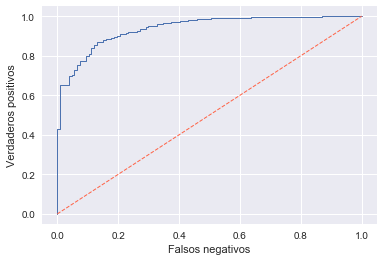

In [23]:
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0,1],  linestyle = '--', lw=1, color='tomato')
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos negativos')

Comentario: Al observar la curva ROC es posible apreciar que el modelo es optimo pues existe una amplia area bajo la curva